In [1]:
%matplotlib inline
from pylab import *
import pandas as pd

In [2]:
crime = pd.read_csv('data/Crime_Map.csv')
crime.head()

,﻿RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location
0,464632,2015177936,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,05/29/2015,05/29/2015,NaN,88XX BLOCK OF 30 AV SW,F,F2,11402.1035,-122.371275,47.523761,"(47.523761274, -122.371274546)"
1,464545,2015177683,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,05/29/2015,05/29/2015,NaN,21XX BLOCK OF N 122 ST,N,N2,600.4000,-122.332545,47.717113,"(47.717113125, -122.332545146)"
2,464630,2015177690,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,05/29/2015,05/29/2015,NaN,57XX BLOCK OF RENTON AV S,R,R3,10300.3007,-122.284951,47.550848,"(47.550848375, -122.284950832)"
3,464640,2015177735,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,05/29/2015,05/29/2015,05/29/2015,5XX BLOCK OF N 81 ST,J,J3,2800.4013,-122.351254,47.687664,"(47.68766356, -122.35125396)"
4,464597,2015177663,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,05/29/2015,05/29/2015,05/29/2015,1XX BLOCK OF NW 76 ST,J,J2,2900.2006,-122.359314,47.684011,"(47.684010507, -122.359314231)"


In [3]:
land = pd.read_csv('data/Land_Use_Permits.csv')
land.head()

,Application/Permit Number,Permit Type,Address,Description,Category,Decision Type,Design Review Included,Value,Applicant Name,Application Date,Decision Date,Appealed?,Issue Date,Status,Contractor,Permit and Complaint Status URL,Latitude,Longitude,Location
0,3014131,"SEPA THRESHOLD DETERMINATION, STREAMLINED ADMI...",1001 STURGUS AVE S,"Land Use Application to allow one, 3-story 5 u...",MULTIFAMILY,II,Y,$700000.00,"STEPHENSON, RYAN",05/27/2015,07/22/2013,N,NaN,Application Accepted,MODERN SHELTER LLC,http://web1.seattle.gov/dpd/PermitStatus/Proje...,47.593705,-122.314503,"(47.5937049, -122.31450253)"
1,3020483,LOT BOUNDARY ADJUSTMENT PLAT,3420 SW GRAHAM ST,Land Use Application to adjust the boundary be...,MULTIFAMILY,I,N,$0.00,"AVENELL, DAVID",05/26/2015,NaN,N,NaN,Application Accepted,POLYGON NORTHWEST COMPANY,http://web1.seattle.gov/dpd/PermitStatus/Proje...,47.546760,-122.376109,"(47.54676012, -122.37610852)"
2,3020195,SEPA THRESHOLD DETERMINATION,4027 FREMONT AVE N,Land Use Application to allow two single famil...,MULTIFAMILY,II,N,$193600.00,"WEBER, JULIAN",05/26/2015,NaN,N,NaN,Application Accepted,NaN,http://web1.seattle.gov/dpd/PermitStatus/Proje...,47.656218,-122.350431,"(47.65621774, -122.35043068)"
3,3020105,ENVIRONMENTALLY CRITICAL AREA,13737 41ST AVE NE,Land Use Application to allow a single family ...,SINGLE FAMILY / DUPLEX,II,N,$302400.00,"NOVION, EINAR",05/26/2015,NaN,N,NaN,Application Accepted,NaN,http://web1.seattle.gov/dpd/PermitStatus/Proje...,47.729275,-122.284869,"(47.7292745, -122.28486904)"
4,3018999,SEPA THRESHOLD DETERMINATION,2510 E CHERRY ST,"Land Use Application to allow 5,900 cu. yds. o...",COMMERCIAL,II,N,$250000.00,"DELANEY, WILLIAM",05/26/2015,NaN,N,NaN,Application Accepted,NaN,http://web1.seattle.gov/dpd/PermitStatus/Proje...,47.608191,-122.299657,"(47.60819051, -122.29965679)"


In [4]:
police = pd.read_csv('data/Seattle_Police_Department_911_Incident_Response.csv')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,7,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
police.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,1105674,15000179476,2015179476,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,05/30/2015 08:22:00 PM,PIKE ST / 3 AV,M,M3,8100.2013,-122.337793,47.609748,"(47.609748463, -122.337793004)","NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",NARCOTICS COMPLAINTS,NARCOTICS COMPLAINTS,NaN
1,1105665,15000179552,2015179552,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,05/30/2015 08:19:00 PM,UNION ST / 3 AV,M,M3,8100.2013,-122.336888,47.608754,"(47.608754101, -122.33688844)","NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",NARCOTICS COMPLAINTS,NARCOTICS COMPLAINTS,NaN
2,1105666,15000179549,2015179549,64,SHOPLIFT,THEFT,SHOPLIFTING,05/30/2015 08:17:00 PM,14XX BLOCK OF 3 AV,M,M3,8100.2015,-122.337339,47.609253,"(47.609252981, -122.337338747)",SHOPLIFT - THEFT,SHOPLIFTING,THEFT,NaN
3,1105677,15000179371,2015179371,244,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,05/30/2015 08:17:00 PM,4XX BLOCK OF E LORETTA PL,E,E1,7402.3002,-122.325937,47.619220,"(47.619219554, -122.325936738)","NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",DISTURBANCES,NOISE DISTURBANCE,05/30/2015 06:09:00 PM
4,1105671,15000179509,2015179509,220,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,05/30/2015 08:17:00 PM,1XX BLOCK OF 21 AV,G,G2,8700.2010,-122.305042,47.603092,"(47.603091545, -122.305041618)",THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"THREATS, HARASSMENT","THREATS, HARASSMENT",NaN


In [7]:
import gps_join
reload(gps_join)

joined_data = gps_join.concat_features_by_neighbors(land, police, X_names=["Event Clearance Description"], radius=.001)

In [18]:
x,y,s = joined_data.as_matrix(["Latitude","Longitude","GANG GRAFFITI"]).T

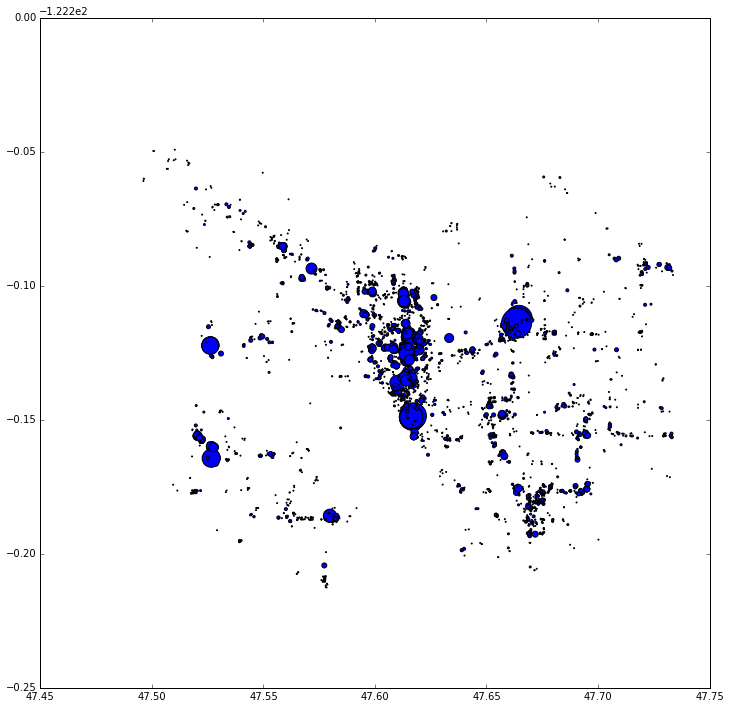

In [22]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, s=s**2.)